In [70]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


#挂载了Drive之后，您可以像访问本地文件系统一样访问Google Drive中的文件

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:

file_path = '/content/drive/My Drive/deep learning HW3/TSLA.csv'
##文件上传到my drive 之后，要用完整的路径来读取文件

df = pd.read_csv(file_path)


In [5]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


In [6]:
df.shape

(1259, 7)

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [8]:
missing_value=df.isnull().sum()
print(missing_value)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


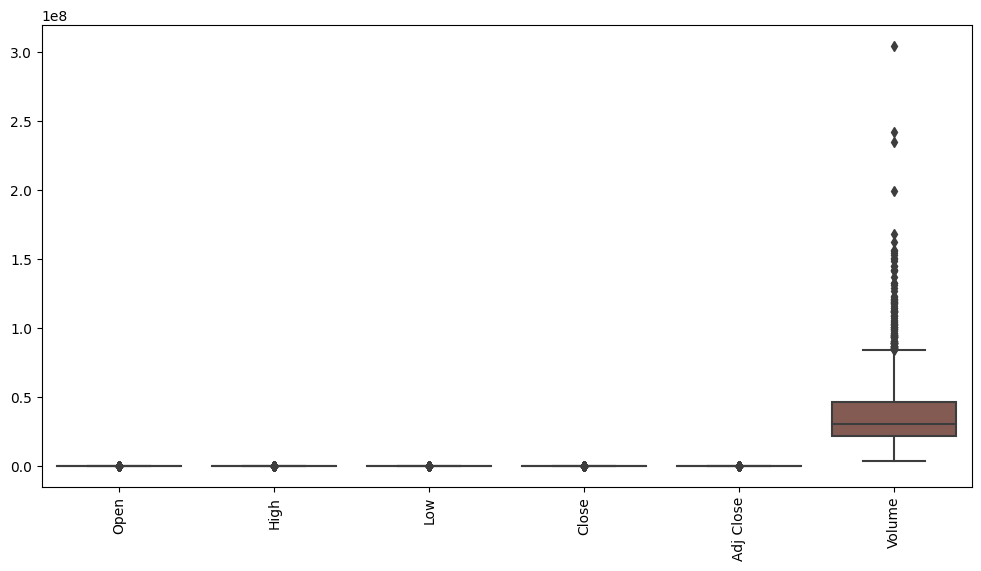

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
#outlier_dates = data[outlier_condition].dropna(how='all').index
#找到outlier对应的日期


file_path = '/content/drive/My Drive/deep learning HW3/TSLA.csv' # 替换为你的文件路径
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')  # 把date列 设为索引



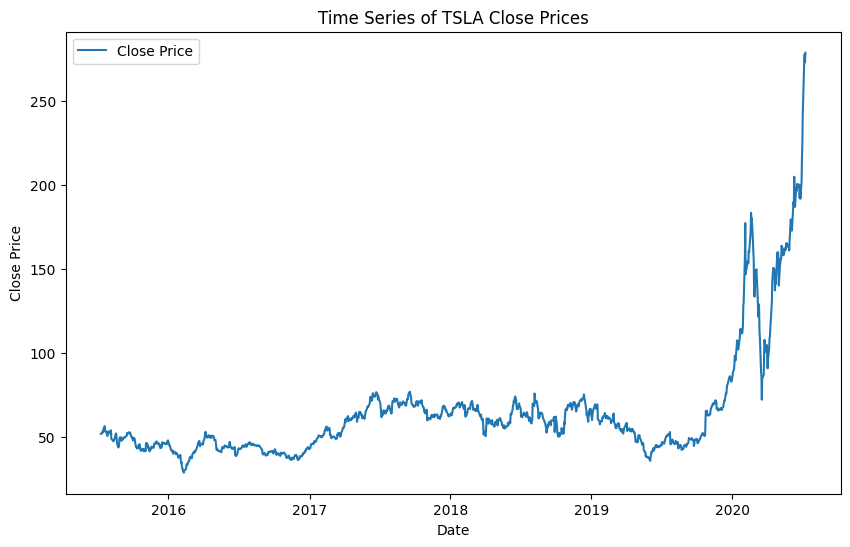

In [16]:
##画时间序列图

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Time Series of TSLA Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import matplotlib.dates as mdates


In [38]:
df['Date'] = pd.to_datetime(df['Date'])

Epoch 1/100
13/13 [==============================] - 6s 90ms/step - loss: 0.2930 - val_loss: 0.2893
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 0.2178 - val_loss: 0.1959
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.1331 - val_loss: 0.0942
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0544 - val_loss: 0.0231
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0238 - val_loss: 0.0135
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0232 - val_loss: 0.0117
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0193 - val_loss: 0.0123
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0175 - val_loss: 0.0101
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0158 - val_loss: 0.0087
Epoch 10/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0134 - val_loss: 0.0076
Ep

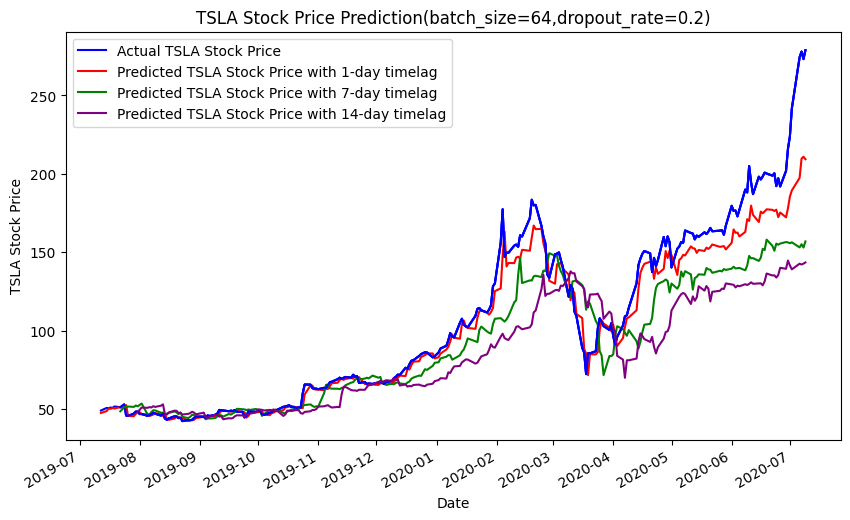

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

# 定义分割数据的比例
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

# Split the data into training and test sets based on the index
train_data = df[:split_index]
test_data = df[split_index:]

# 定义一个创建lagged features的函数
def create_lagged_features(data, lags):
    lagged_data = pd.DataFrame(index=data.index)
    for lag in lags:
        lagged_data[f'lag_{lag}'] = data['Close'].shift(lag)
    return lagged_data

# 定义LSTM模型结构
def build_lstm_model(input_shape, neurons=50, dropout_rate=0.2, optimizer='adam', loss='mean_squared_error'):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(neurons))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# 定义lags
lags = [1, 7, 14]
predicted_stock_prices = []
dates_list = []  # 为每次迭代存储相应的日期
y_tests = []  # 存储每次迭代的y_test


# 循环为每个lag训练模型并进行预测
for lag in lags:
    train_lagged = create_lagged_features(train_data, [lag]).dropna()
    test_lagged = create_lagged_features(test_data, [lag]).dropna()

    y_train = train_data.loc[train_lagged.index]['Close']
    y_test = test_data.loc[test_lagged.index]['Close']

    y_tests.append(y_test)  # 添加当前迭代的y_test到列表

    # Initialize and fit the scalers for each iteration
    X_scaler = MinMaxScaler()
    X_train_normalized = X_scaler.fit_transform(train_lagged)

    Y_scaler = MinMaxScaler()
    y_train_normalized = Y_scaler.fit_transform(y_train.values.reshape(-1, 1))

    X_test_normalized = X_scaler.transform(test_lagged)
    y_test_normalized = Y_scaler.transform(y_test.values.reshape(-1, 1))

    # Reshape data to 3D for LSTM
    X_train_reshaped = np.reshape(X_train_normalized, (X_train_normalized.shape[0], 1, X_train_normalized.shape[1]))
    X_test_reshaped = np.reshape(X_test_normalized, (X_test_normalized.shape[0], 1, X_test_normalized.shape[1]))

    lstm_model = build_lstm_model(input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    lstm_model.fit(X_train_reshaped, y_train_normalized, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

    predicted_stock_prices_normalized = lstm_model.predict(X_test_reshaped)
    predicted_stock_prices.append(Y_scaler.inverse_transform(predicted_stock_prices_normalized))
    dates_list.append(test_data.loc[test_lagged.index]['Date'].values)

# ...[可视化的代码]


# 可视化预测结果
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'purple']

for i, lag in enumerate(lags):
    plt.plot(dates_list[i], y_tests[i].values, color='blue', label='Actual TSLA Stock Price' if i==0 else "")  # 使用y_tests[i]代替y_test
    plt.plot(dates_list[i], predicted_stock_prices[i], color=colors[i], label=f'Predicted TSLA Stock Price with {lag}-day timelag')

# 设置x轴为日期格式，并设置间隔为每月
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())  # 设置主要的间隔为每月
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式
plt.gcf().autofmt_xdate()  # 旋转x轴的标签以增加可读性

plt.title('TSLA Stock Price Prediction(batch_size=64,dropout_rate=0.2)')
plt.xlabel('Date')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()



Epoch 1/100
13/13 [==============================] - 9s 106ms/step - loss: 0.3022 - val_loss: 0.3034
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.2329 - val_loss: 0.2203
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.1575 - val_loss: 0.1236
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0789 - val_loss: 0.0407
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0324 - val_loss: 0.0139
Epoch 6/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0308 - val_loss: 0.0128
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0285 - val_loss: 0.0141
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0252 - val_loss: 0.0129
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0246 - val_loss: 0.0115
Epoch 10/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0223 - val_loss: 0.0093
Ep

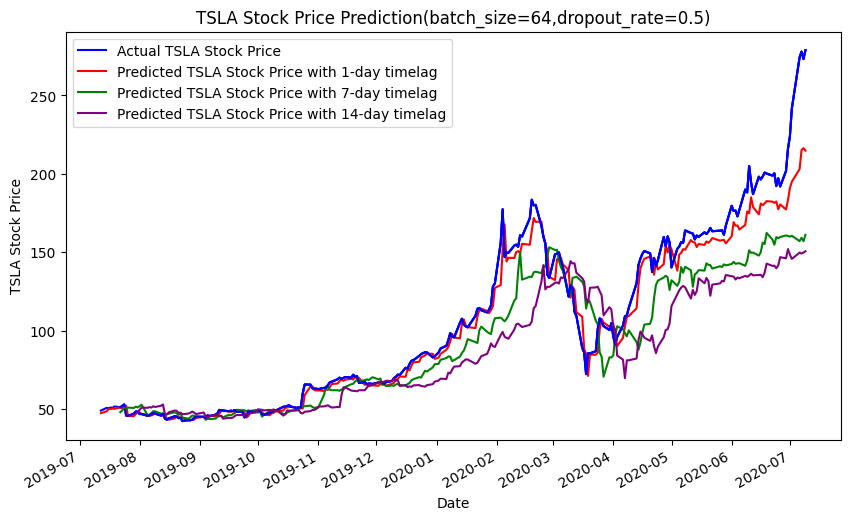

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler

# 假设df已经定义，并且包含Close和Date列
# 如果没有，请确保导入或定义适当的数据。

# 定义分割数据的比例
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

# Split the data into training and test sets based on the index
train_data = df[:split_index]
test_data = df[split_index:]

# 定义一个创建lagged features的函数
def create_lagged_features(data, lags):
    lagged_data = pd.DataFrame(index=data.index)
    for lag in lags:
        lagged_data[f'lag_{lag}'] = data['Close'].shift(lag)
    return lagged_data

# 定义LSTM模型结构
def build_lstm_model(input_shape, neurons=50, dropout_rate=0.5, optimizer='adam', loss='mean_squared_error'):
    model = Sequential()
    model.add(LSTM(neurons, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(neurons))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    return model

# 定义lags
lags = [1, 7, 14]
predicted_stock_prices = []
dates_list = []
y_tests = []

for lag in lags:
    train_lagged = create_lagged_features(train_data, [lag]).dropna()
    test_lagged = create_lagged_features(test_data, [lag]).dropna()

    y_train = train_data.loc[train_lagged.index]['Close']
    y_test = test_data.loc[test_lagged.index]['Close']

    y_tests.append(y_test)

    # Normalize the data
    X_scaler = MinMaxScaler()
    X_train_normalized = X_scaler.fit_transform(train_lagged)

    Y_scaler = MinMaxScaler()
    y_train_normalized = Y_scaler.fit_transform(y_train.values.reshape(-1, 1))

    X_test_normalized = X_scaler.transform(test_lagged)

    X_train_reshaped = np.reshape(X_train_normalized, (X_train_normalized.shape[0], 1, X_train_normalized.shape[1]))
    X_test_reshaped = np.reshape(X_test_normalized, (X_test_normalized.shape[0], 1, X_test_normalized.shape[1]))

    lstm_model = build_lstm_model(input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    lstm_model.fit(X_train_reshaped, y_train_normalized, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

    predicted_stock_prices_normalized = lstm_model.predict(X_test_reshaped)
    predicted_stock_prices.append(Y_scaler.inverse_transform(predicted_stock_prices_normalized))
    dates_list.append(test_data.loc[test_lagged.index]['Date'].values)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'purple']

for i, lag in enumerate(lags):
    plt.plot(dates_list[i], y_tests[i].values, color='blue', label='Actual TSLA Stock Price' if i == 0 else "")
    plt.plot(dates_list[i], predicted_stock_prices[i], color=colors[i], label=f'Predicted TSLA Stock Price with {lag}-day timelag')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

plt.title('TSLA Stock Price Prediction(batch_size=64,dropout_rate=0.5)')
plt.xlabel('Date')
plt.ylabel('TSLA Stock Price')
plt.legend()
plt.show()


Epoch 1/80
20/20 [==============================] - 7s 42ms/step - loss: 0.0297
Epoch 2/80
20/20 [==============================] - 1s 43ms/step - loss: 0.0134
Epoch 3/80
20/20 [==============================] - 1s 44ms/step - loss: 0.0066
Epoch 4/80
20/20 [==============================] - 1s 42ms/step - loss: 0.0045
Epoch 5/80
20/20 [==============================] - 1s 43ms/step - loss: 0.0031
Epoch 6/80
20/20 [==============================] - 1s 65ms/step - loss: 0.0028
Epoch 7/80
20/20 [==============================] - 1s 71ms/step - loss: 0.0020
Epoch 8/80
20/20 [==============================] - 1s 70ms/step - loss: 0.0023
Epoch 9/80
20/20 [==============================] - 1s 63ms/step - loss: 0.0023
Epoch 10/80
20/20 [==============================] - 1s 42ms/step - loss: 0.0022
Epoch 11/80
20/20 [==============================] - 1s 41ms/step - loss: 0.0023
Epoch 12/80
20/20 [==============================] - 1s 46ms/step - loss: 0.0022
Epoch 13/80
20/20 [==================

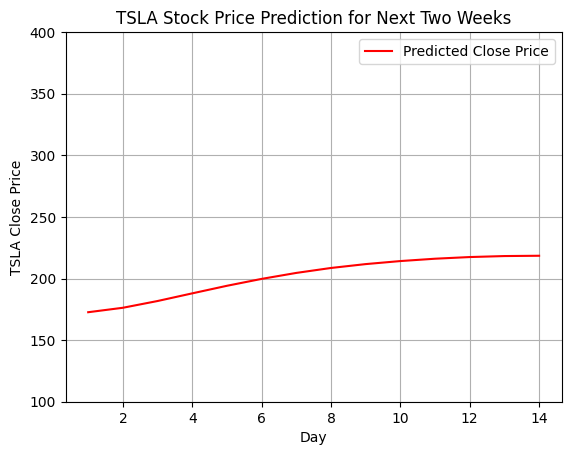

In [76]:
####Using the data provided, make predictions for future 1day, 1 week, two weeks. Visualize the results.

# Build and train model
model_new = Sequential()
for _ in range(2):
    model_new.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model_new.add(Dropout(0.2))
model_new.add(LSTM(units=50, activation='tanh'))
model_new.add(Dropout(0.2))
model_new.add(Dense(1))

model_new.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')
model_new.fit(X_train, y_train, epochs=80, batch_size=64)

# Make future predictions
def make_future_predictions(model, data, look_back, horizon, Y_scaler):
    future_predictions = []
    last_data_points = data[-look_back:].flatten()

    for _ in range(horizon):
        input_data = last_data_points[-look_back:].reshape(1, look_back, 1)
        predicted_value = model.predict(input_data)
        predicted_value_unscaled = Y_scaler.inverse_transform(predicted_value)

        future_predictions.append(predicted_value_unscaled[0][0])

        # Append the scaled prediction to the last_data_points for the next prediction iteration
        last_data_points = np.append(last_data_points, predicted_value)

    return np.array(future_predictions)

predicted_2_weeks = make_future_predictions(model_new, X_test, look_back, 14, Y_scaler)

days = list(range(1, 15))

plt.plot(days, predicted_2_weeks, label='Predicted Close Price', color='r')
plt.xlabel('Day')
plt.ylabel('TSLA Close Price')
plt.title('TSLA Stock Price Prediction for Next Two Weeks')
plt.ylim(100,400)
plt.grid(True)
plt.legend()
plt.show()
